# SCALING AND NORMALIZATION : CONSTANT FACTOR

<br>

# Introduction

<br>

In [1]:
# SETUP : importing

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import math

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

import utilcompute as uc
import utilplot as up
import preprocessing as pre

from scipy import stats


C:\Users\danis_p50\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# SETUP : reading in the datasets

data = np.column_stack( (load_boston().data, load_boston().target) )
df = pd.DataFrame(data)
df.columns = [
    'CRIM',    # per capita crime rate by town
    'ZN',      # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',   # proportion of non-retail business acres per town
    'CHAS',    # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',     # nitric oxides concentration (parts per 10 million)
    'RM',      # average number of rooms per dwelling
    'AGE',     # proportion of owner-occupied units built prior to 1940
    'DIS',     # weighted distances to five Boston employment centres
    'RAD',     # index of accessibility to radial highways
    'TAX',     # full-value property-tax rate per $10,000
    'PTRATIO', # pupil-teacher ratio by town
    'B',       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT',   # % lower status of the population
    'MEDV'     # median value of owner-occupied homes in $1000's
]


In [3]:
#df.describe()

In [4]:
# SHUFFLING 

seed = 10
np.random.seed(seed)

df = df.reindex(np.random.permutation(df.index))


In [5]:
# FEATURES SELECTION 

target = 'MEDV'
features = [c for c in df.columns if (c != target)]


In [6]:
# FEATURE SELECTION

# from now on, even though we'll run the model with all the features, 
# we'll scale only the following 

selected_features = ['RM', 'B', 'PTRATIO']


In [7]:
results_cols_to_print = ['note'] + selected_features + ['RAD'] + ['R2']


In [8]:
# linear regression - ols

#scale = 1
#df_scaled = pre.scale_dataframe(df = df, scale = sc, selected_features = selected_features)

#results = uc.compute_kfold_stats(
#    df = df, 
#    features = features,
#    target = [target], 
#    linear_model_name = 'LinearRegression', 
#    linear_model_args = None,
#    note = str(scale)+'x')

#print(results[results_cols_to_print])


In [9]:
# linear regression - ols

scales = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125]

results = pd.DataFrame()

for (sc_index, sc) in enumerate(scales):
    df_scaled = pre.scale_dataframe(df = df, scale = sc, selected_features = selected_features)

    results_temp = uc.compute_kfold_stats(
        df = df_scaled, 
        features = features,
        target = [target], 
        linear_model_name = 'LinearRegression', 
        linear_model_args = None,
        note = str(sc)+'x',
        task = 'regression')
    
    #print(results_temp[results_cols_to_print])
    results = results.append(results_temp).reset_index(drop = True)


In [10]:
# linear regression - ols - selected features (1/2 = 0.5)x scaling

#scale = 0.5
#df_scaled = pre.scale_dataframe(df = df, scale = scale, selected_features = selected_features)

#results_temp = uc.compute_kfold_stats(
#    df = df_scaled, 
#    features = features,
#    target = [target],  
#    linear_model_name = 'LinearRegression', 
#    linear_model_args = None,
#    note = str(scale)+'x')

#results = results.append(results_temp).reset_index(drop = True)

#print(results_temp[results_cols_to_print])


## <font color='#28B463'>Impact on the intercept

<br>

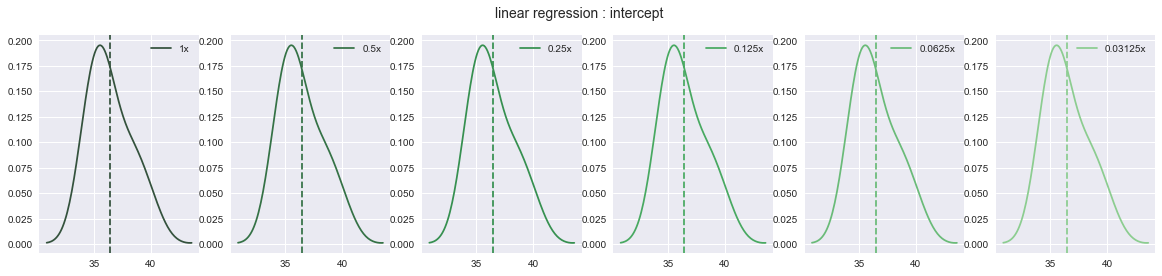

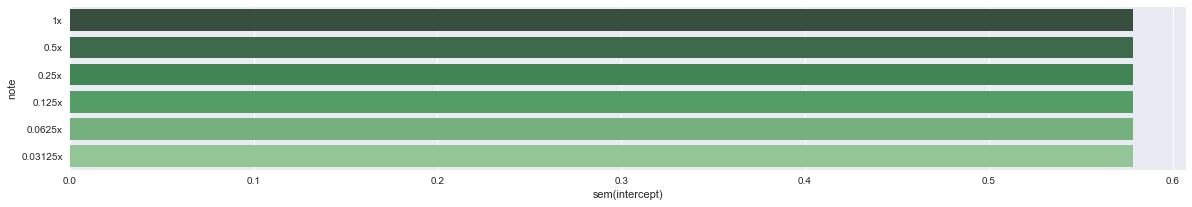

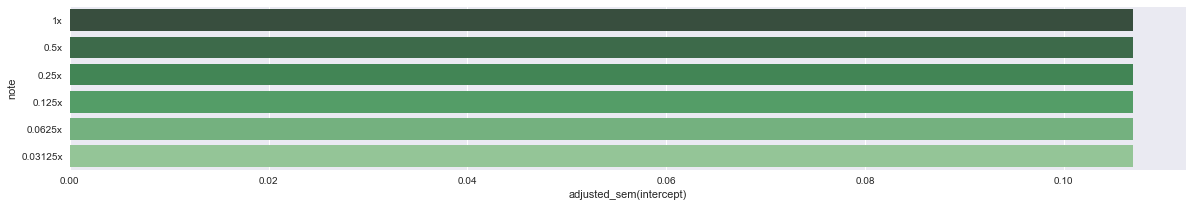

In [11]:
up.plot_across_discriminant(
    df = results, 
    cols = ['intercept'], 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = True,
    sem      = True, 
    adj_sem  = True,
    mean     = False
)

## <font color='#28B463'>Impact on the regression coefficients of the transformed features

<br>
We can observe an inversely proportional relationship between the scale of the feature ($a$) and : <br>

<br>
<ul style="list-style-type:square">
    <li>
        the scale of the new coefficients ($1\ / \ a$)
    </li>
    <br>
    <li>
        the scale of the new standard error and consequently of the new standard deviation as well
    </li>
</ul>

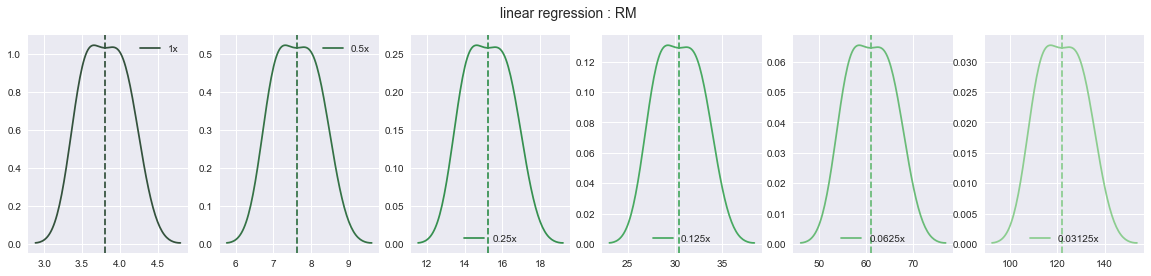

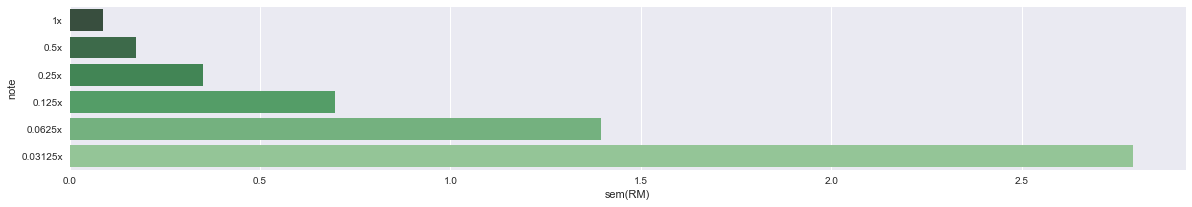

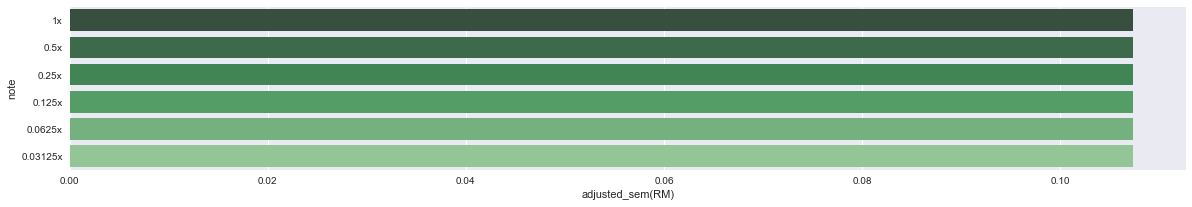

In [12]:
visualized_features = selected_features[:1]

up.plot_across_discriminant(
    df = results, 
    cols = visualized_features, 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = True,
    sem      = True, 
    adj_sem  = True,
    mean     = False
)


## Impact on the regression coefficients of the non-transformed features

<br>
In the graphs below only three of the ten non-scaled feature are represented, but the plots all show the same result. 
<br>
No meaningful difference can be observed in the estimated regression coefficients of the non-scaled features.


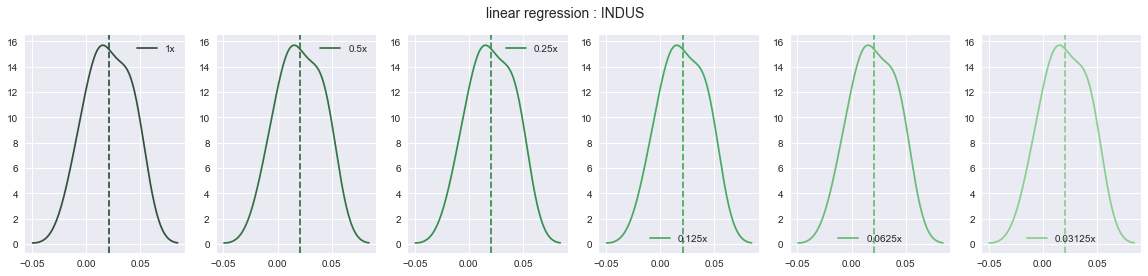

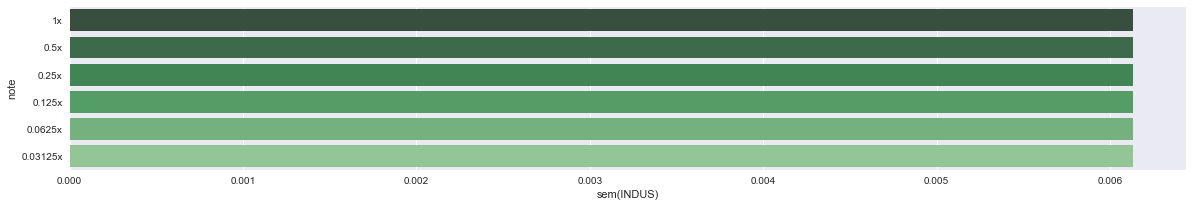

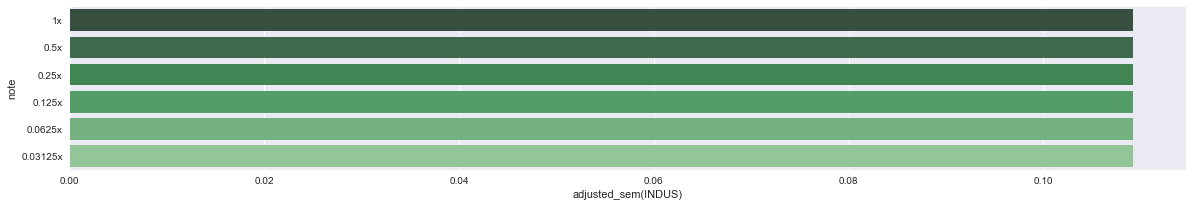

In [13]:
visualized_features = ['INDUS']

up.plot_across_discriminant(
    df = results, 
    cols = visualized_features, 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = True,
    sem      = True, 
    adj_sem  = True,
    mean     = False
)


## Impact on the regression score

<br>
No meaningful difference can be observed in the regression score.

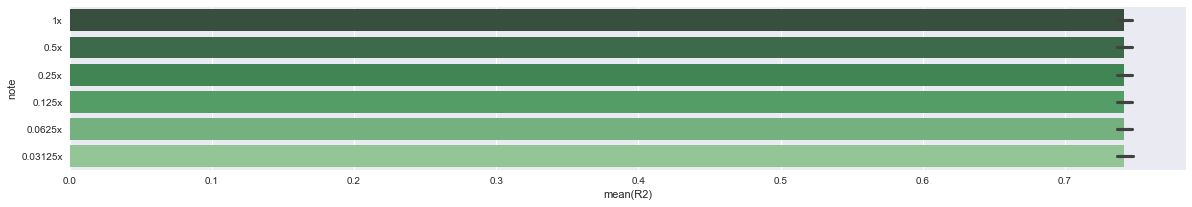

In [14]:
up.plot_across_discriminant(
    df = results, 
    cols = ['R2'], 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = False,
    sem      = False, 
    adj_sem  = False,
    mean     = True
)
